In [1]:
# uncomment these lines if using colab

#!pip install -q holidays
#!pip install -q catboost

     |████████████████████████████████| 64.4MB 57kB/s 


In [0]:
import pandas as pd
from datetime import datetime, date, timedelta
import holidays
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import math
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [0]:
hk_holidays = holidays.HongKong()

In [0]:
df = pd.read_csv("./data/q3.csv")

In [0]:
# generate features from dates
# special_event is indicatior for socail unrest in Hong Kong starting from 7/2019
# which larger affected the retail industry 

df["datetime"] = df['date'].apply(lambda x: datetime.strptime(x.split(" ")[0], "%m/%d/%Y"))

df["year"] = df["datetime"].apply(lambda x: x.year)
df["month"] = df["datetime"].apply(lambda x: x.month)
df["week"] = df["datetime"].apply(lambda x: x.week)

weekdays_string = ("1-Monday","2-Tuesday","3-Wednesday","4-Thursday","5-Friday","6-Saturday","7-Sunday")

df["weekdays"] = df["datetime"].apply(lambda x: weekdays_string[x.weekday()])
df["calendar_day"] = df["datetime"].apply(lambda x: x.day)
df["holidays"] = df["datetime"].apply(lambda x: x in hk_holidays)

df["special_event"] = 0

df.loc[(df["year"] == 2019) & ((df["month"] == 7) | (df["month"] == 8) | (df["month"] == 9) | (df["month"] == 10)) \
       & ((df["weekdays"] == "6-Saturday") | (df["weekdays"] == "7-Sunday")) , "special_event"] = 1

In [0]:
#visualise and observe the patterns and realtions between different features and turnover

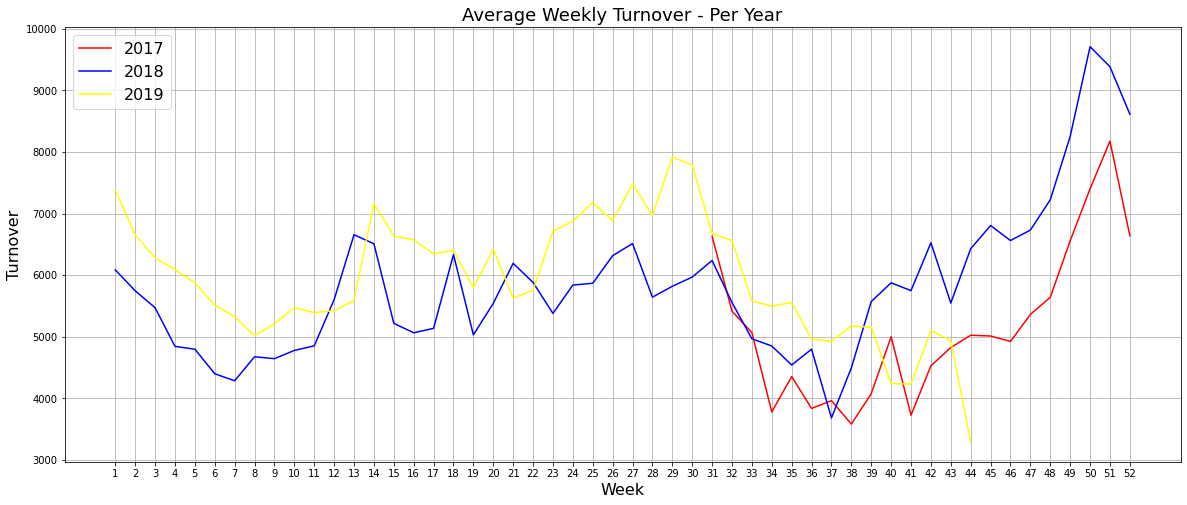

In [11]:
weekly_turnover_2017 = df[df.year==2017]['turnover'].groupby(df['week']).mean()
weekly_turnover_2018 = df[df.year==2018]['turnover'].groupby(df['week']).mean()
weekly_turnover_2019 = df[df.year==2019]['turnover'].groupby(df['week']).mean()
plt.figure(figsize=(20,8))
sns.lineplot(weekly_turnover_2017.index, weekly_turnover_2017.values, color='red')
sns.lineplot(weekly_turnover_2018.index, weekly_turnover_2018.values, color='blue')
sns.lineplot(weekly_turnover_2019.index, weekly_turnover_2019.values, color='yellow')
plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2017', '2018', '2019'], loc='best', fontsize=16)
plt.title('Average Weekly Turnover - Per Year', fontsize=18)
plt.ylabel('Turnover', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

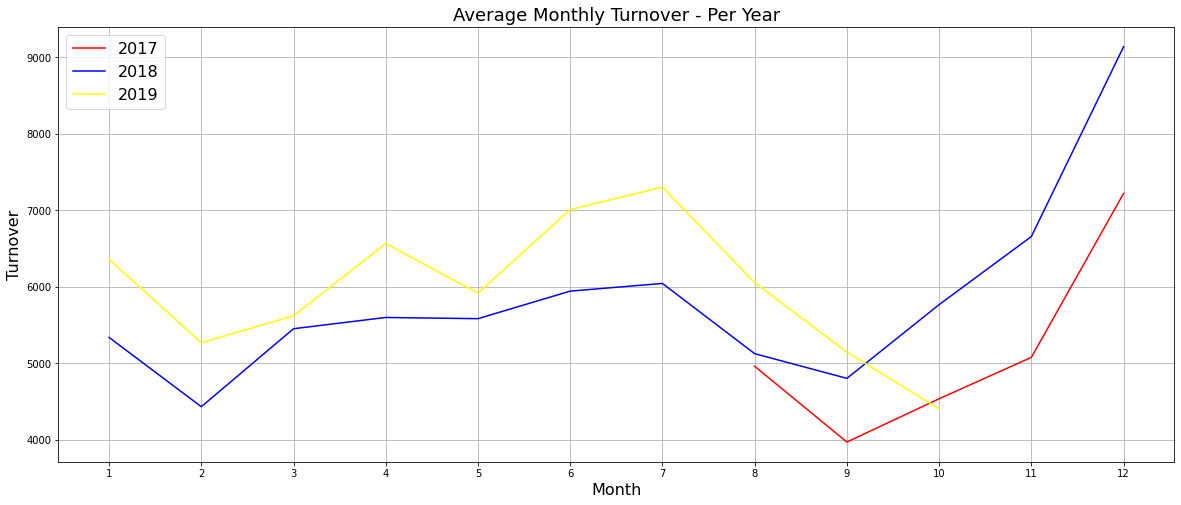

In [12]:
monthly_turnover_2017 = df[df.year==2017]['turnover'].groupby(df['month']).mean()
monthly_turnover_2018 = df[df.year==2018]['turnover'].groupby(df['month']).mean()
monthly_turnover_2019 = df[df.year==2019]['turnover'].groupby(df['month']).mean()
plt.figure(figsize=(20,8))
sns.lineplot(monthly_turnover_2017.index, monthly_turnover_2017.values, color='red')
sns.lineplot(monthly_turnover_2018.index, monthly_turnover_2018.values, color='blue')
sns.lineplot(monthly_turnover_2019.index, monthly_turnover_2019.values, color='yellow')
plt.grid()
plt.xticks(np.arange(1, 13, step=1))
plt.legend(['2017', '2018', '2019'], loc='best', fontsize=16)
plt.title('Average Monthly Turnover - Per Year', fontsize=18)
plt.ylabel('Turnover', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.show()

In [0]:
# we can see that in September 2017 and 2018, the turnover rate was increasing 
# however, in September 2019, the turnover droped a lot 
# this is probably due to the social unrest issues

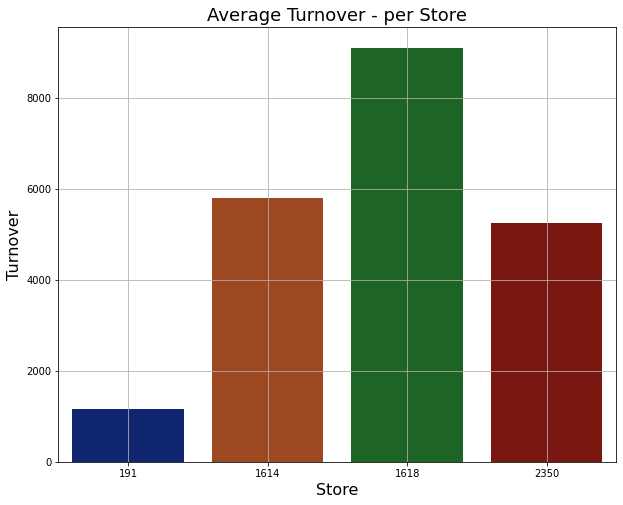

In [13]:
turnover_by_store = df['turnover'].groupby(df['store']).mean()
plt.figure(figsize=(10,8))
sns.barplot(turnover_by_store.index, turnover_by_store.values, palette='dark')
plt.grid()
plt.title('Average Turnover - per Store', fontsize=18)
plt.ylabel('Turnover', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

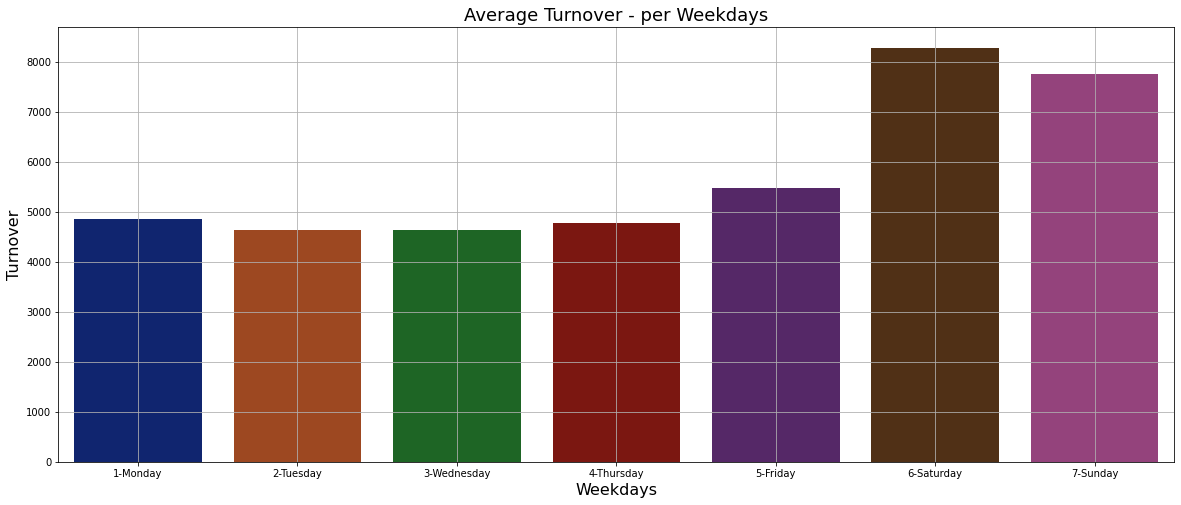

In [14]:
turnover_by_weekdays = df['turnover'].groupby(df['weekdays']).mean()
plt.figure(figsize=(20,8))
sns.barplot(turnover_by_weekdays.index, turnover_by_weekdays.values, palette='dark')
plt.grid()
plt.title('Average Turnover - per Weekdays', fontsize=18)
plt.ylabel('Turnover', fontsize=16)
plt.xlabel('Weekdays', fontsize=16)
plt.show()

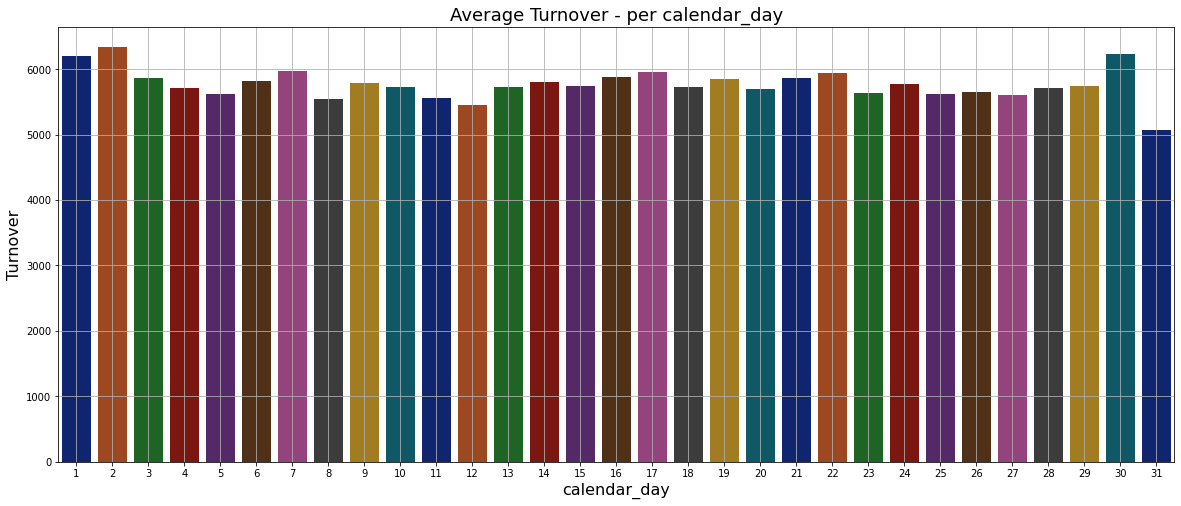

In [15]:
turnover_by_calendar_day = df['turnover'].groupby(df['calendar_day']).mean()
plt.figure(figsize=(20,8))
sns.barplot(turnover_by_calendar_day.index, turnover_by_calendar_day.values, palette='dark')
plt.grid()
plt.title('Average Turnover - per calendar_day', fontsize=18)
plt.ylabel('Turnover', fontsize=16)
plt.xlabel('calendar_day', fontsize=16)
plt.show()

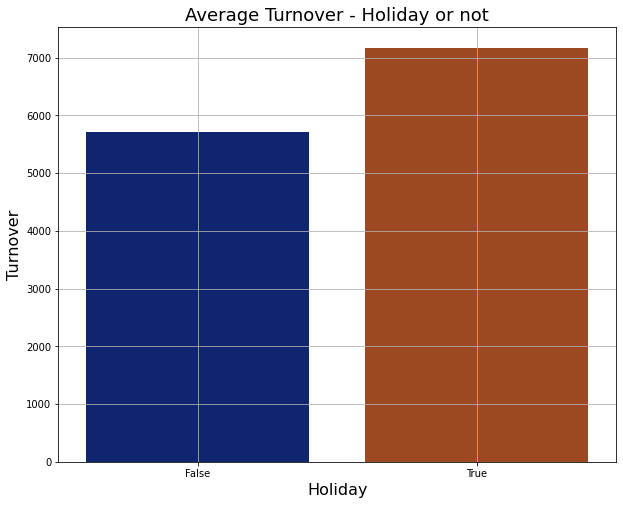

In [16]:
turnover_by_holidays = df['turnover'].groupby(df['holidays']).mean()
plt.figure(figsize=(10,8))
sns.barplot(turnover_by_holidays.index, turnover_by_holidays.values, palette='dark')
plt.grid()
plt.title('Average Turnover - Holiday or not', fontsize=18)
plt.ylabel('Turnover', fontsize=16)
plt.xlabel('Holiday', fontsize=16)
plt.show()

In [0]:
# train a model with all the available data

In [0]:
X_train = df.drop(columns=["datetime","date","to_type","turnover","quantity","nb_transaction","year"])
y_train = df[["turnover"]]

In [18]:
model_2020 = CatBoostRegressor(cat_features=["sport","store","weekdays","month","calendar_day","holidays","special_event"], eval_metric="RMSE")
model_2020.fit(X_train,y_train)

Learning rate set to 0.081528
0:	learn: 11876.9250636	total: 115ms	remaining: 1m 54s
1:	learn: 11256.3339085	total: 150ms	remaining: 1m 14s
2:	learn: 10708.0648064	total: 191ms	remaining: 1m 3s
3:	learn: 10212.2396709	total: 240ms	remaining: 59.8s
4:	learn: 9752.8440323	total: 285ms	remaining: 56.6s
5:	learn: 9357.9219113	total: 318ms	remaining: 52.8s
6:	learn: 9006.8566738	total: 355ms	remaining: 50.4s
7:	learn: 8649.9510640	total: 390ms	remaining: 48.4s
8:	learn: 8324.1545493	total: 443ms	remaining: 48.8s
9:	learn: 8043.0842121	total: 480ms	remaining: 47.5s
10:	learn: 7824.0880800	total: 516ms	remaining: 46.4s
11:	learn: 7593.9149620	total: 556ms	remaining: 45.8s
12:	learn: 7414.7087526	total: 597ms	remaining: 45.4s
13:	learn: 7225.5582394	total: 636ms	remaining: 44.8s
14:	learn: 7074.1201945	total: 685ms	remaining: 45s
15:	learn: 6920.9052276	total: 726ms	remaining: 44.7s
16:	learn: 6787.6242844	total: 762ms	remaining: 44s
17:	learn: 6668.5804068	total: 803ms	remaining: 43.8s
18:	le

In [0]:
# get the type of sport available in each store and assume these remain the same in 2020

In [0]:
last_month = df[(df["year"] == 2019) & (df["month"] == 10)].copy()

In [0]:
last_month["cat"] = last_month["sport"]+"+"+last_month["store"].astype(str)

In [0]:
unique_cat = last_month["cat"].unique()

In [0]:
start_date = date(2020, 1, 1)   
end_date = date(2020, 12, 31)  

delta = end_date - start_date       

days_2020_list = []
for i in range(delta.days + 1):
    days_2020_list.append(start_date + timedelta(days=i))

In [0]:
df_2020 = pd.DataFrame(days_2020_list, columns=["datetime"])

In [0]:
df_2020["datetime"] = df_2020['datetime'].apply(lambda x: datetime.strptime(str(x), "%Y-%m-%d"))

In [0]:
df_2020["cat"] = df_2020["datetime"].apply(lambda x: unique_cat)

In [0]:
df_2020 = df_2020.explode("cat")

In [0]:
df_2020["sport"] = df_2020["cat"].apply(lambda x: x.split("+")[0])
df_2020["store"] = df_2020["cat"].apply(lambda x: x.split("+")[1])

In [0]:
df_2020["year"] = df_2020["datetime"].apply(lambda x: x.year)
df_2020["month"] = df_2020["datetime"].apply(lambda x: x.month)
df_2020["week"] = df_2020["datetime"].apply(lambda x: x.week)

df_2020["weekdays"] = df_2020["datetime"].apply(lambda x: weekdays_string[x.weekday()])
df_2020["calendar_day"] = df_2020["datetime"].apply(lambda x: x.day)
df_2020["holidays"] = df_2020["datetime"].apply(lambda x: x in hk_holidays)

In [0]:
#In 2020, the retail industry has been larged affected again by the social unrest and coronavirus
#So, assume all the days in 2020 having label 1 in special_event column

In [0]:
df_2020["special_event"] = 1

In [0]:
X_pred = df_2020.drop(columns=["datetime","cat","year"])

In [0]:
y_pred = model_2020.predict(X_pred)

In [0]:
X_result = X_pred.copy()
X_result["turnover_pred"] = y_pred

In [0]:
X_plot = X_result.groupby(["store","month"])["turnover_pred"].sum().reset_index()

In [55]:
X_result.groupby(["store","month"])["turnover_pred"].sum()

store  month
1614   1       3652200.414
       2       2809045.992
       3       3635152.243
       4       4170491.781
       5       4013249.836
       6       4034328.935
       7       3972988.946
       8       3072226.744
       9       2574640.257
       10      3133137.266
       11      3635752.499
       12      4839588.406
1618   1       6588581.906
       2       4498893.573
       3       6177979.137
       4       6614072.905
       5       6643263.555
       6       6921240.263
       7       7233809.064
       8       4044498.861
       9       3070485.817
       10      2322636.874
       11      5034640.287
       12      7584024.058
191    1        869142.730
       2        587001.767
       3        602589.191
       4        544167.288
       5        581635.060
       6        722649.099
       7        706877.551
       8        659008.554
       9        562138.902
       10       779117.870
       11       804390.805
       12       615586.472
2350   1       

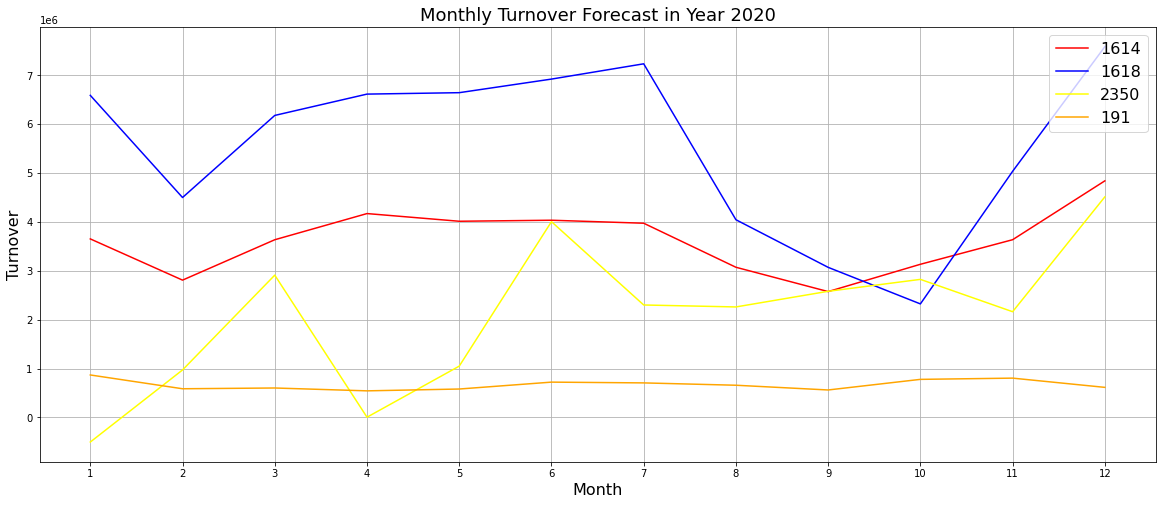

In [53]:
plt.figure(figsize=(20,8))
sns.lineplot(X_plot[X_plot.store=='1614'].month, X_plot[X_plot.store=='1614'].turnover_pred, color='red')
sns.lineplot(X_plot[X_plot.store=='1618'].month, X_plot[X_plot.store=='1618'].turnover_pred, color='blue')
sns.lineplot(X_plot[X_plot.store=='2350'].month, X_plot[X_plot.store=='2350'].turnover_pred, color='yellow')
sns.lineplot(X_plot[X_plot.store=='191'].month, X_plot[X_plot.store=='191'].turnover_pred, color='orange')
plt.grid()

plt.xticks(np.arange(1, 13, step=1))
plt.legend(['1614', '1618', '2350','191'], loc='best', fontsize=16)
plt.title('Monthly Turnover Forecast in Year 2020', fontsize=18)
plt.ylabel('Turnover', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.show()

In [0]:
# The second model is to assume that we want to forest the turnover of x day later
# The following model forest the turnover 1 day later
# x can be change by the day_later parameter in the get_rolling_avg() function

In [0]:
df = pd.read_csv("./data/q3.csv")

In [0]:
df["datetime"] = df['date'].apply(lambda x: datetime.strptime(x.split(" ")[0], "%m/%d/%Y"))

df["year"] = df["datetime"].apply(lambda x: x.year)
df["month"] = df["datetime"].apply(lambda x: x.month)
df["week"] = df["datetime"].apply(lambda x: x.week)

df["weekdays"] = df["datetime"].apply(lambda x: weekdays_string[x.weekday()])
df["calendar_day"] = df["datetime"].apply(lambda x: x.day)
df["holidays"] = df["datetime"].apply(lambda x: x in hk_holidays)

In [0]:
holdout_result = df[df["year"] == 2019].copy()
test_result = df[df["year"] == 2018].copy()

In [0]:
def get_rolling_avg(df,group,target,day_later):
    
    col_name_1d = target + "_1d_lag" + "_" + "_".join([x[:3] for x in group])
    col_name_7d_avg = target + "_7d_avg" + "_" + "_".join([x[:3] for x in group])
    col_name_30d_avg = target + "_30d_avg" + "_" + "_".join([x[:3] for x in group])

    group_df = df.groupby(group)[target].mean().reset_index()
    group_df[col_name_1d] = group_df[target].shift(day_later)
    group_df[col_name_7d_avg] = group_df[col_name_1d].transform(lambda x: x.rolling(7, 7).mean())
    group_df[col_name_30d_avg] = group_df[col_name_1d].transform(lambda x: x.rolling(30, 30).mean())

    group_df = group_df.fillna(group_df.mean())
    df = df.merge(group_df.drop(columns=[target]), how="left", on=group)
    return df

In [0]:
for i in ["turnover","quantity","nb_transaction"]:
    df = get_rolling_avg(df,["datetime","store","sport"],i,1)
    df = get_rolling_avg(df,["datetime","store"],i,1)
    df = get_rolling_avg(df,["datetime","sport"],i,1)

In [0]:
df_train = df[df["year"] == 2017]
df_test = df[df["year"] == 2018]
df_holdout = df[df["year"] == 2019]

In [0]:
X_train = df_train.drop(columns=["date","turnover","datetime","to_type"])
y_train = df_train[["turnover"]]

In [0]:
X_test = df_test.drop(columns=["date","turnover","datetime","to_type"])
y_test = df_test[["turnover"]]

In [0]:
X_holdout = df_holdout.drop(columns=["date","turnover","datetime","to_type"])
y_holdout = df_holdout[["turnover"]]

In [0]:
model = CatBoostRegressor(cat_features=["sport","store","weekdays","month","calendar_day","holidays"], eval_metric="RMSE")

In [66]:
model.fit(X_train,y_train,eval_set=[(X_test,y_test)])

Learning rate set to 0.07201
0:	learn: 11508.0182124	test: 12602.2205422	best: 12602.2205422 (0)	total: 39ms	remaining: 38.9s
1:	learn: 10844.8565971	test: 11983.7440770	best: 11983.7440770 (1)	total: 76.1ms	remaining: 38s
2:	learn: 10234.5444251	test: 11439.7417150	best: 11439.7417150 (2)	total: 110ms	remaining: 36.5s
3:	learn: 9699.2751513	test: 10901.4682223	best: 10901.4682223 (3)	total: 145ms	remaining: 36s
4:	learn: 9158.8037215	test: 10448.1687993	best: 10448.1687993 (4)	total: 179ms	remaining: 35.6s
5:	learn: 8666.4427682	test: 10001.8110219	best: 10001.8110219 (5)	total: 218ms	remaining: 36.1s
6:	learn: 8179.1884008	test: 9597.0507244	best: 9597.0507244 (6)	total: 253ms	remaining: 35.9s
7:	learn: 7738.6091780	test: 9167.2262199	best: 9167.2262199 (7)	total: 287ms	remaining: 35.6s
8:	learn: 7328.3919864	test: 8822.3675408	best: 8822.3675408 (8)	total: 321ms	remaining: 35.4s
9:	learn: 6977.7033041	test: 8473.5338749	best: 8473.5338749 (9)	total: 352ms	remaining: 34.9s
10:	learn:

In [67]:
test_pred = model.predict(X_test)
print(math.sqrt(mean_squared_error(y_test,test_pred)))
test_result['turnover_pred'] = test_pred
test_result.groupby(["store","month"])["turnover","turnover_pred"].sum()

3775.296610825046


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


turnover  turnover_pred
store month                            
191   1       999061.630     534546.519
      2       504234.110     267094.662
      3       514263.400     281095.633
      4       494300.990     313586.891
      5       623413.050     320339.317
      6       556628.140     331393.632
      7       397653.940     272778.339
      8       487261.160     448385.345
      9       550508.300     418764.142
      10      759745.480     532679.563
      11      784297.280     717910.900
      12      931163.740     812571.981
1614  1      3909463.270    3278077.000
      2      3190025.940    2658609.571
      3      4674595.060    3696279.168
      4      4569701.040    3623262.109
      5      4690047.150    3675341.480
      6      4521545.580    3586795.450
      7      4616712.170    3700385.438
      8      3993308.770    3221058.021
      9      3670466.110    3086919.066
      10     4658776.090    3901027.433
      11     4748494.220    4319698.366
      12     6645246.260    6018008.187
1618  1      6739673.960    5507468.973
      2      5108499.480    3971293.065
      3      7017606.960    5777919.463
      4      7058087.930    6014588.506
      5      7338648.010    6369540.040
      6      7546048.930    6439224.014
      7      8137575.050    6971557.616
      8      6760110.740    5715093.061
      9      5822326.510    5139937.293
      10     7736178.210    6952820.323
      11     8767637.160    7964500.847
      12    12502386.620   11388568.861

In [68]:
holdout_pred = model.predict(X_holdout)
print(math.sqrt(mean_squared_error(y_holdout,holdout_pred)))
holdout_result['turnover_pred'] = holdout_pred
holdout_result.groupby(["store","month"])["turnover","turnover_pred"].sum()

4270.775186481816


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


turnover  turnover_pred
store month                            
191   1       909486.400     427958.369
      2       675725.360     395450.813
      3       769702.580     466524.198
      4       784569.220     342411.058
      5       687906.040     357348.077
      6       805292.890     384382.038
      7      1004070.150     595614.937
      8       888635.470     538414.550
      9       846567.200     481543.187
      10     1172701.890     625558.763
1614  1      4312865.550    2877520.841
      2      3451874.050    2597232.720
      3      4221913.690    3079659.233
      4      4742685.620    3388740.158
      5      4421840.670    3170544.036
      6      4684116.820    3364663.357
      7      5052468.160    3912697.885
      8      4510751.340    3481016.511
      9      3570444.310    2715820.447
      10     3443773.600    2778303.056
1618  1      8743651.650    6349452.090
      2      6689130.030    5163636.648
      3      7931456.030    6415806.321
      4      9172947.830    7066908.105
      5      8510191.120    6758537.942
      6      9197089.330    7578832.196
      7     11292143.190    9543835.120
      8      9650573.160    8287095.616
      9      7453125.070    6104219.883
      10     5902314.550    5098728.731
2350  6      4247678.040    3258029.983
      7      5581531.880    4620475.928
      8      3955296.130    3260337.424
      9      3204013.100    2346308.389
      10     2840718.800    1983316.452